In [706]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [707]:
import requests as re
import re # for regex
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [708]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-17 23:44:34.695471


In [709]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [710]:
# parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(10000) # FIXME remover no final

In [711]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [712]:
# dataset - tamanho
df_reviews.shape

(10000, 10)

In [713]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [714]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [715]:
df_reviews.shape

(10000, 10)

In [716]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [717]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
456324,456325,B0016BOAF8,A2W3SAOSYKUT0Q,schefe,1,1,5,1265932800,xylichew gum,longer lasting flavor and nicer softer chew th...
207722,207723,B00012182G,A1ED81AG0VYT14,John Fast,66,77,2,1310947200,"""Not So Fresh"" Feeling","I ordered two of these ""fresh, whole rabbits"" ..."
345703,345704,B000ED9L9E,A3331B46ANCIJY,Michelle,2,2,5,1325548800,Yum!,I am surprised how much I like this oat bran. ...


In [718]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    6381
4    1364
1     905
2     531
Name: Score, dtype: int64

In [719]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [720]:
df_reviews["negative"].value_counts()

0    7745
1    1436
Name: negative, dtype: int64

In [721]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'longer lasting flavor and nicer softer chew than other xyltol gums<br />seems to be out of stock frequently.I ordered two of these "fresh, whole rabbits" because I thought they would make excellent pets for my kids.  Imagine our shock, horror, and disgust when they arrived dead and mutilated.  Someone had killed the rabbits, skinned and gutted them, and even cut off their ears!<br /><br />I have ordered a second pair of rabbits, because I can\'t believe whatever horrible accident befell the first pair could possibly happen again.<br /><br />P.S.: I rated this two stars instead of only one, because we decided to eat the rabbits and they were tasty when sauteed with butter and onions, just like chicken or cat.I am surprised how much I like this oat bran.  I have it for breakfast almost every morning.  It\'s kind of a cross between wheat hearts and oat meal.  Very tasty! I gave a bag to my sister and she also loves it!Dark chocolate has always tasted bitter to me, so I\'ve avoided it eve

In [722]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [723]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [724]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 4050,
 'like': 3751,
 'good': 2982,
 'one': 2681,
 'great': 2550,
 'taste': 2446,
 'coffee': 2398,
 'tea': 2219,
 'flavor': 2161,
 'product': 2070}

In [725]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

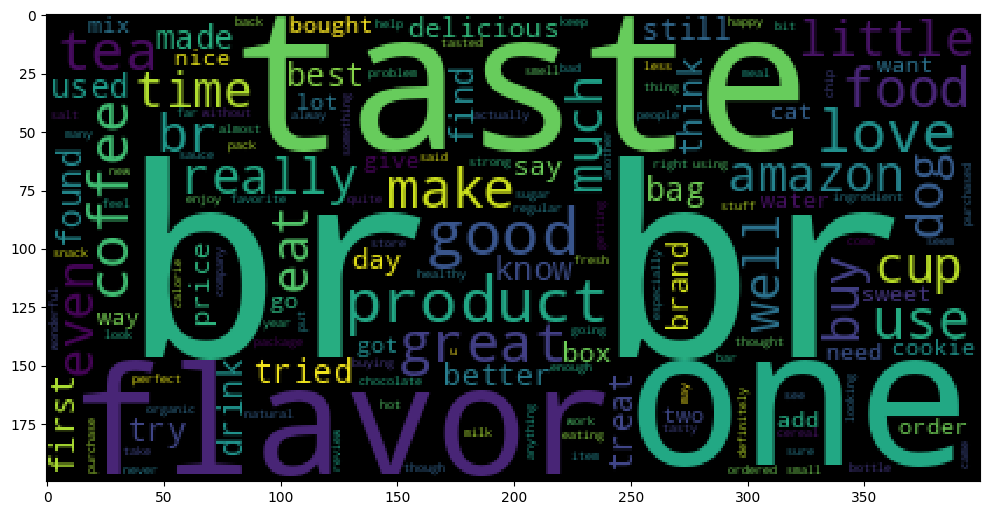

In [726]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [727]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 4050,
 'like': 3751,
 'good': 2982,
 'one': 2681,
 'great': 2550,
 'taste': 2446,
 'coffee': 2398,
 'tea': 2219,
 'flavor': 2161,
 'product': 2070}

In [728]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

<Figure size 1600x600 with 0 Axes>

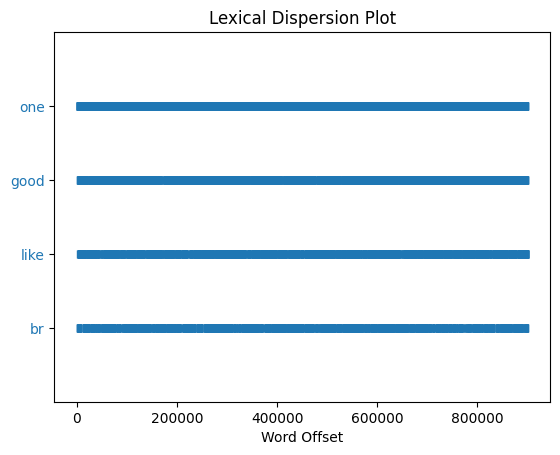

In [729]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
nltk_text.dispersion_plot(dispersion_words)

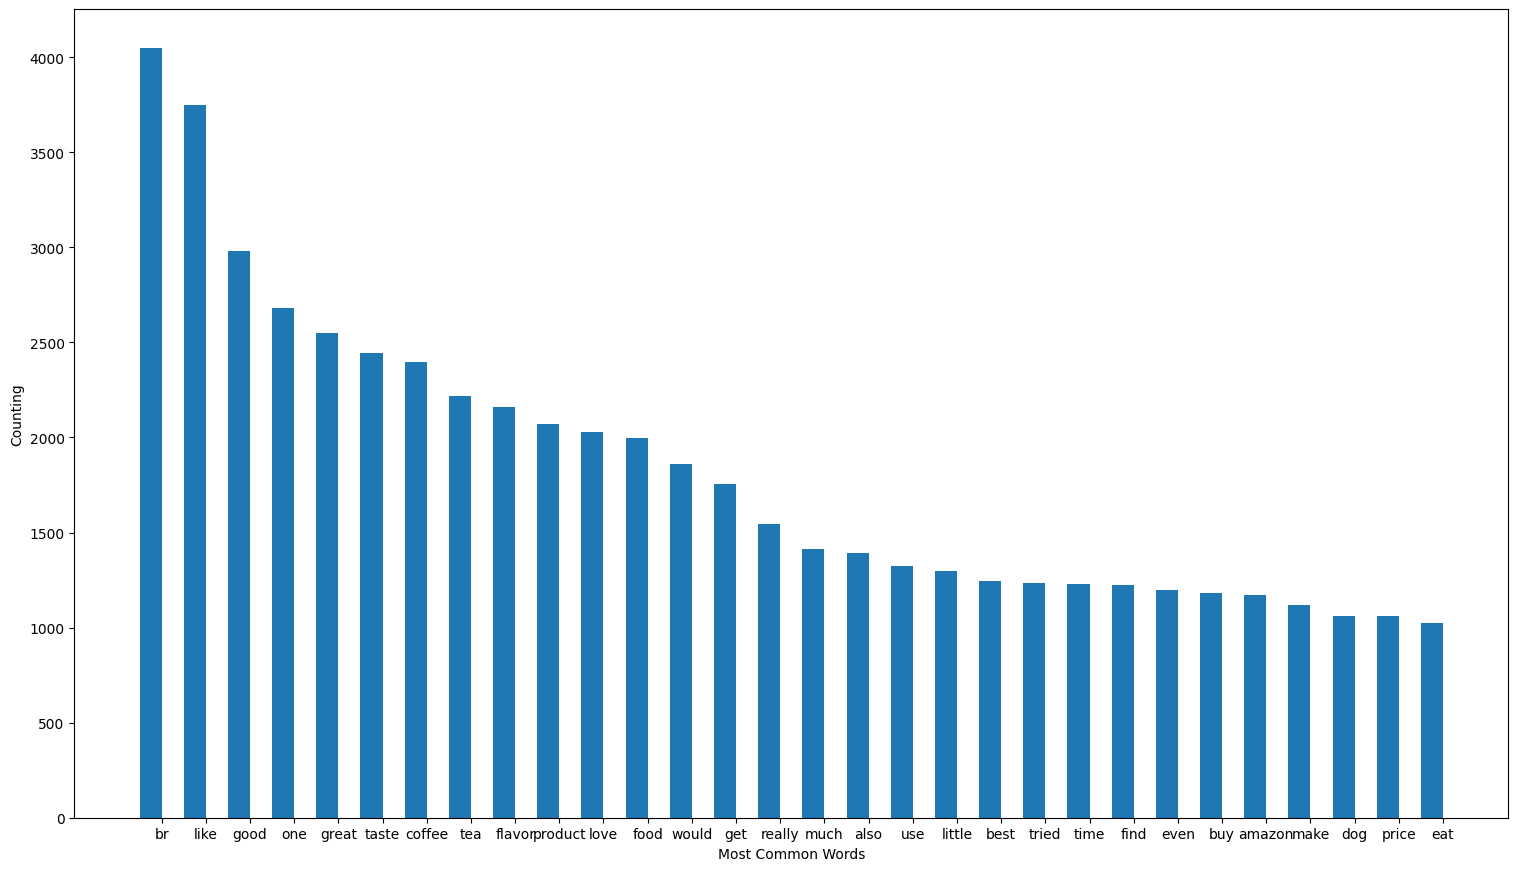

In [730]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [731]:
# remove tags html
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [732]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [733]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [734]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)
#df_reviews['Text']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [735]:
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
df_reviews['Text']

456324    longer last flavor nicer softer chew xyltol gu...
207722    order two fresh whole rabbit thought would mak...
345703    surpris much like oat bran breakfast almost ev...
37653     dark chocol alway tast bitter avoid even thoug...
403413    got sea salt vinegar chip kettl use salt vineg...
                                ...                        
3578      look futher alway fresh noth wors stale candi ...
383532    general big instant coffe still littl pricey e...
518857    eat peanut chew sinc kid came 1 bar 1980 broug...
63529     love illi coffe thought would enjoy can bevera...
336477    purchas base pet shop owner recommend disappoi...
Name: Text, Length: 9181, dtype: object

In [736]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [737]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(df_reviews, df_reviews['negative']):
    train_set = df_reviews.loc[train_index]
    test_set = df_reviews.loc[test_index]

KeyError: '[1051, 7726, 7293, 2306, 8467, 6406, 3505, 8433, 4598, 5790, 4392, 2998, 3268, 7069, 6649, 7970, 3620, 2090, 3218, 7743, 2177, 9135, 886, 5565, 372, 1633, 5059, 527, 1204, 3947, 8491, 6626, 222, 7082, 4242, 918, 989, 1803, 4856, 5052, 3045, 2222, 4584, 7164, 7617, 1751, 4112, 2969, 7021, 2845, 373, 1645, 797, 4414, 3628, 3195, 913, 1842, 4701, 2458, 1748, 326, 990, 5964, 3733, 7601, 8623, 6607, 8946, 2581, 4023, 1917, 192, 8331, 664, 204, 4649, 7234, 8764, 8740, 8355, 6625, 1408, 8845, 3952, 5849, 2760, 6470, 5575, 4225, 2356, 7182, 4558, 1339, 1839, 7659, 3187, 4470, 6564, 6358, 5167, 1810, 5845, 1921, 7709, 1643, 4086, 5696, 1043, 6701, 4237, 3499, 7257, 530, 2556, 7884, 5169, 380, 8365, 2656, 6236, 1277, 7425, 301, 1264, 173, 4355, 2431, 3358, 8160, 1726, 1664, 4938, 6915, 3216, 86, 7778, 3086, 1493, 560, 5423, 454, 8025, 4480, 1628, 1665, 2919, 3331, 5976, 2160, 5563, 8885, 1443, 123, 2174, 835, 143, 3308, 4722, 3556, 4026, 7785, 7178, 2297, 3257, 8681, 4097, 8137, 7162, 7454, 4814, 6388, 1791, 6068, 1403, 1502, 1694, 8459, 489, 879, 3252, 7907, 6455, 1600, 3464, 3352, 7232, 8055, 1682, 3648, 6479, 3047, 5899, 8311, 3436, 1952, 7438, 8398, 6804, 6846, 1972, 8872, 1353, 2294, 8782, 1144, 2278, 3490, 1420, 3533, 5419, 7889, 909, 7297, 3836, 8835, 426, 953, 694, 5037, 68, 1549, 8267, 5888, 8752, 3079, 6947, 2188, 7936, 4256, 2371, 232, 5744, 5824, 8189, 5921, 5792, 2559, 6964, 959, 2573, 5452, 5290, 3804, 7358, 8741, 4326, 443, 7607, 633, 8381, 7054, 7883, 6445, 2847, 7290, 5004, 9148, 338, 3152, 3259, 8755, 3046, 4266, 1341, 5048, 6744, 6569, 104, 6807, 8789, 2622, 3168, 2603, 5454, 2935, 411, 7866, 3922, 5557, 4172, 3438, 1737, 5005, 1078, 7389, 4461, 1196, 517, 1863, 6340, 6253, 2953, 1131, 6116, 3972, 2370, 7813, 3807, 5947, 5292, 2663, 1714, 4459, 5569, 5291, 1710, 5692, 89, 5689, 1149, 5104, 6002, 1164, 6056, 2501, 847, 1068, 6645, 4614, 2166, 8669, 7387, 4167, 193, 1350, 4157, 5475, 1799, 8372, 8444, 1993, 8724, 5950, 6051, 1370, 8988, 3191, 307, 1717, 6535, 185, 6647, 6978, 3544, 1046, 8794, 7094, 130, 5414, 1293, 5556, 1554, 2082, 209, 2074, 3298, 829, 1023, 8674, 866, 3370, 4624, 3569, 5371, 5040, 4963, 2981, 5352, 942, 7640, 6785, 4641, 7213, 7931, 8105, 975, 5593, 8034, 6778, 8842, 1734, 6117, 5622, 4098, 8496, 6225, 5635, 210, 5039, 7528, 2827, 951, 30, 4684, 740, 1123, 5813, 7256, 8856, 8236, 4262, 1497, 4849, 5013, 478, 1920, 4907, 9091, 5188, 5604, 4821, 1570, 7876, 4547, 8858, 832, 600, 2102, 1322, 6888, 4793, 1805, 7621, 4990, 7038, 8884, 8950, 2060, 7568, 5232, 5606, 2664, 7810, 94, 1433, 8436, 4265, 6791, 4336, 7639, 1103, 8964, 1577, 6084, 5054, 3147, 5517, 2098, 1571, 2865, 4254, 6894, 4291, 5064, 6927, 7223, 4807, 5751, 6881, 6906, 3498, 1831, 3959, 4245, 6815, 2099, 8586, 993, 798, 5675, 1889, 3694, 551, 794, 7334, 2364, 4135, 4285, 320, 8723, 5063, 3230, 3348, 7269, 4585, 5833, 3188, 3441, 3217, 3366, 881, 5081, 6335, 8598, 3775, 3658, 5799, 6577, 623, 315, 5255, 718, 7588, 441, 6558, 2259, 5612, 5364, 4957, 2818, 7189, 7599, 6071, 8563, 3231, 5867, 2638, 7851, 1233, 1537, 4474, 1427, 2411, 5670, 4054, 1115, 1801, 6115, 5092, 3554, 955, 2154, 4661, 820, 85, 6214, 8607, 4280, 1369, 7409, 5755, 1656, 7134, 4197, 2679, 4277, 6679, 10, 2061, 8214, 8497, 4864, 115, 6961, 4572, 914, 8057, 5046, 7481, 1690, 7097, 3737, 504, 3369, 6144, 9044, 5662, 4411, 3289, 6933, 3612, 1190, 6057, 1228, 7524, 5355, 9126, 3636, 7727, 655, 2731, 2156, 4050, 960, 7485, 2815, 9088, 1122, 7979, 3616, 2685, 8317, 4077, 4510, 6752, 4420, 6844, 3778, 627, 8131, 3482, 756, 7692, 2883, 1440, 6200, 4493, 7373, 1660, 3251, 6722, 7569, 6634, 2022, 1848, 1259, 7845, 5278, 1765, 8675, 8341, 4842, 5148, 3561, 377, 5340, 7277, 8962, 8092, 6397, 1352, 5158, 1834, 8714, 3396, 1938, 4478, 363, 4676, 8602, 5960, 830, 8831, 6154, 1185, 2124, 8897, 5113, 733, 3713, 550, 1348, 2024, 3394, 8556, 5677, 5913, 3918, 6420, 5886, 8452, 2964, 7041, 2418, 3150, 5426, 5884, 5206, 253, 8409, 2232, 676, 2611, 8663, 6884, 4882, 9078, 3406, 5143, 5269, 5300, 5503, 1837, 7208, 6342, 7, 4654, 2759, 573, 4693, 1243, 4454, 2849, 4508, 1923, 421, 4248, 6665, 2681, 540, 5741, 8044, 4327, 5138, 510, 4338, 9010, 8528, 8920, 1009, 6753, 8775, 2904, 5137, 6561, 1197, 5534, 6592, 7394, 8263, 8167, 9028, 4804, 9009, 2129, 7141, 6101, 4196, 1207, 7217, 1518, 4022, 3313, 671, 6603, 4509, 9018, 8873, 3167, 6715, 2878, 289, 5723, 3253, 4378, 1649, 8538, 7982, 904, 2274, 7977, 7725, 8610, 3076, 1636, 4294, 7641, 3400, 6021, 9093, 242, 0, 6689, 946, 594, 452, 3305, 3779, 6658, 7264, 1209, 2184, 5835, 3140, 4216, 2653, 6238, 5319, 5954, 5105, 769, 8134, 9133, 3469, 8575, 8350, 171, 4986, 535, 6706, 5209, 76, 5898, 4305, 1976, 211, 4696, 5590, 9050, 3649, 124, 8256, 8225, 4790, 6240, 2751, 7243, 920, 5129, 3716, 3235, 5597, 8969, 148, 5583, 262, 2182, 2595, 8508, 6212, 2210, 3584, 6726, 2771, 2852, 805, 6648, 5074, 4319, 2385, 767, 2379, 4100, 4246, 8454, 2522, 2064, 628, 3072, 1364, 7875, 5171, 6310, 1563, 601, 5804, 2334, 8314, 8870, 8783, 4472, 8587, 2927, 5988, 7849, 7312, 8577, 2947, 2269, 8851, 3386, 1260, 1066, 1182, 7682, 6123, 8768, 1280, 7856, 4877, 2547, 8880, 7858, 962, 8757, 5995, 4651, 7296, 2757, 7964, 5800, 1560, 8067, 1953, 2705, 9053, 2511, 7242, 8470, 6196, 8269, 4764, 3362, 2256, 5544, 9062, 2395, 3621, 1512, 4815, 2614, 4710, 1142, 7829, 1089, 7468, 4082, 7890, 742, 3885, 5103, 6704, 2358, 9169, 7386, 1099, 5564, 2077, 6800, 7163, 5122, 7019, 7206, 5827, 7028, 5396, 1969, 7872, 2114, 595, 6390, 2451, 2397, 6208, 3476, 6246, 513, 1651, 2726, 7020, 5949, 2144, 1525, 3822, 6698, 8124, 6621, 2480, 7281, 2138, 7471, 4152, 1205, 5991, 2338, 429, 8178, 5520, 3090, 6641, 6109, 978, 6351, 7918, 6160, 1985, 2068, 3665, 7604, 265, 2365, 4388, 2903, 3949, 822, 7991, 8294, 6325, 6454, 2702, 2907, 2550, 1394, 2325, 593, 2171, 3664, 303, 3668, 3489, 4276, 6710, 564, 2985, 592, 8439, 5780, 4449, 2065, 3291, 1429, 7037, 215, 2668, 1567, 5056, 8593, 8732, 7056, 3092, 4116, 5220, 7363, 3177, 4613, 7902, 3981, 5958, 7444, 5501, 2542, 255, 1308, 4475, 6076, 8371, 117, 5957, 6306, 63, 1398, 7216, 347, 2901, 6085, 5353, 888, 3742, 8644, 3535, 7306, 4183, 621, 7400, 5181, 8711, 4129, 2649, 2486, 3155, 8059, 4127, 7440, 127, 6745, 6100, 5272, 7365, 674, 19, 4768, 8520, 1764, 3689, 1143, 5299, 8986, 1772, 6143, 107, 7633, 3532, 5010, 7558, 5860, 6779, 8334, 6346, 2774, 2580, 1481, 8364, 1171, 6004, 1011, 5700, 8770, 6308, 4994, 5379, 4689, 9038, 2474, 6501, 548, 816, 3461, 9103, 525, 7683, 2732, 4362, 7754, 6584, 4553, 4982, 4867, 7861, 6937, 8568, 5781, 4033, 6371, 415, 1105, 6457, 2968, 3224, 4198, 7595, 293, 4219, 310, 8251, 5136, 7380, 7353, 8474, 5740, 3213, 9144, 5115, 6195, 7974, 7043, 5674, 4919, 6327, 2070, 3329, 5619, 8649, 3875, 4223, 5687, 1073, 1174, 7207, 8107, 1454, 5672, 264, 8866, 7998, 4568, 8093, 2315, 8638, 6161, 2743, 9118, 2577, 3594, 625, 3501, 5449, 1937, 3055, 2932, 5259, 1648, 4787, 3480, 3931, 4587, 2367, 4153, 849, 2410, 7620, 7137, 8689, 6459, 654, 9012, 8557, 8816, 1706, 570, 1274, 7265, 3193, 8595, 5327, 8930, 7310, 1000, 9016, 8509, 5083, 4166, 15, 355, 2143, 4224, 2389, 4805, 3412, 8386, 3205, 2155, 947, 2675, 6202, 1063, 6880, 2567, 5754, 5109, 5335, 6241, 8011, 8540, 7396, 2101, 7192, 790, 8152, 5365, 1779, 201, 7740, 4876, 6178, 8402, 276, 5166, 3048, 4892, 5058, 7892, 419, 8958, 3730, 4778, 223, 5, 4041, 8976, 238, 4268, 2321, 5303, 1332, 2697, 3915, 8412, 4625, 6190, 2299, 5631, 6083, 2994, 7772, 4561, 4332, 5309, 6149, 1052, 4001, 2381, 6845, 5738, 7421, 122, 5903, 5550, 3452, 4076, 7716, 2062, 6540, 3710, 7294, 5130, 4068, 1705, 1609, 8367, 3771, 2237, 3650, 1109, 8566, 5650, 6331, 6955, 1974, 8, 4207, 1804, 7142, 3953, 6728, 2186, 2861, 1379, 1335, 1956, 730, 6180, 1752, 7857, 3281, 8730, 6837, 3481, 7988, 3596, 8748, 7348, 2190, 7642, 3309, 1266, 7697, 7677, 4752, 2434, 7333, 3099, 8065, 6717, 198, 3085, 2499, 7534, 2092, 1802, 4788, 1167, 3856, 2618, 8679, 5271, 8166, 3471, 7913, 7070, 4923, 8772, 128, 6968, 4998, 156, 7770, 5228, 7801, 3934, 892, 1200, 7874, 1135, 2561, 1457, 3274, 6925, 8173, 7914, 3732, 6748, 11, 4253, 6667, 3767, 4101, 7898, 4528, 1119, 7681, 806, 4206, 521, 3180, 4243, 6052, 6018, 7086, 2915, 4176, 1595, 7273, 7301, 4783, 3210, 2128, 5877, 1026, 88, 3324, 5589, 6099, 3889, 1029, 37, 8580, 7992, 371, 3884, 1386, 6055, 7372, 7833, 6421, 6806, 9106, 1310, 3246, 7376, 5778, 7822, 4479, 7287, 8821, 5361, 5502, 8465, 3604, 2537, 6376, 7049, 7714, 3682, 5691, 8096, 4261, 7261, 2536, 6830, 4717, 2952, 1054, 2623, 1992, 3964, 3924, 7703, 1812, 7750, 7157, 6415, 5936, 1830, 6119, 9056, 4155, 428, 2648, 2661, 3766, 5893, 3708, 7064, 8321, 6092, 743, 118, 8216, 1688, 681, 1025, 8161, 4218, 353, 8952, 4175, 2087, 75, 4812, 4988, 5380, 252, 2238, 6450, 4605, 4444, 3632, 7065, 6666, 2228, 7763, 4424, 8423, 3826, 9150, 8848, 4911, 4267, 4048, 6892, 392, 1028, 6794, 2339, 4766, 113, 1781, 631, 2066, 6890, 8424, 9084, 5854, 8455, 8664, 9132, 1315, 3503, 2249, 722, 1973, 3839, 6986, 3040, 930, 7384, 5912, 2110, 2961, 5160, 6930, 5164, 6007, 2967, 7836, 7666, 923, 9139, 684, 7089, 2004, 6926, 7759, 7497, 7315, 516, 5561, 5094, 7554, 4668, 8079, 3197, 3840, 3781, 1687, 1482, 5582, 1994, 4272, 1195, 6396, 6221, 2819, 1852, 6403, 4853, 7777, 8388, 381, 3355, 8245, 933, 6829, 8505, 500, 3307, 7095, 8287, 5221, 3847, 565, 2992, 1703, 7118, 666, 8100, 4652, 1389, 2612, 6292, 8516, 3976, 8468, 1517, 8860, 1006, 3698, 3492, 1128, 6424, 7950, 1744, 6527, 6918, 1927, 7487, 749, 7196, 4659, 5050, 6652, 715, 735, 3028, 3244, 4549, 3936, 3715, 5023, 2490, 5939, 5737, 4514, 6676, 4600, 3212, 8707, 330, 3411, 257, 9154, 4976, 4354, 4774, 7736, 1888, 5276, 4455, 4880, 370, 661, 2606, 4113, 8297, 8374, 4283, 6008, 3384, 5504, 1432, 7335, 5584, 7399, 1912, 3803, 4835, 2745, 4753, 7268, 614, 1535, 6798, 5408, 3951, 7160, 2549, 7075, 7662, 3041, 5022, 7193, 2918, 6557, 7955, 898, 3527, 2100, 7661, 186, 2153, 4633, 2006, 6660, 5246, 8787, 7459, 1365, 8727, 940, 586, 8262, 512, 9033, 3645, 6570, 4948, 5465, 8736, 7039, 1468, 782, 8349, 5195, 5508, 7286, 6662, 6319, 6171, 8859, 8929, 475, 8571, 2646, 877, 7464, 8299, 2894, 5609, 864, 4181, 6256, 6469, 1916, 4713, 1387, 2433, 4900, 3979, 1439, 3156, 1872, 5978, 7877, 4273, 865, 7828, 5831, 8923, 648, 4174, 5451, 3546, 8432, 1489, 5149, 8784, 3706, 408, 3285, 5262, 3699, 3151, 711, 50, 4192, 6189, 4236, 7424, 9000, 5168, 4151, 8940, 5621, 1877, 4499, 3751, 4537, 6285, 5658, 7530, 4730, 2382, 1587, 4241, 555, 6486, 4890, 5406, 2111, 92, 162, 1, 4858, 6609, 3965, 2272, 2641, 5485, 8448, 5885, 6727, 390, 3932, 3376, 5805, 4343, 2583, 6904, 8989, 5007, 3602, 4655, 4187, 2270, 3916, 6094, 3551, 7757, 1226, 4992, 2735, 6506, 813, 1245, 8323, 8095, 6009, 3043, 1865, 3888, 1471, 2692, 4309, 53, 8047, 2384, 6864, 5519, 2604, 2696, 8562, 3834, 3983, 515, 8592, 6975, 619, 775, 7862, 5289, 1843, 2067, 4820, 7230, 4691, 611, 1271, 2234, 1951, 3044, 8532, 9101, 2704, 7061, 8519, 7667, 7622, 8339, 5901, 533, 4383, 64, 1217, 2078, 692, 8413, 4494, 136, 3402, 159, 3127, 2268, 8553, 299, 9161, 9121, 4150, 2300, 5053, 4865, 4515, 6317, 5798, 318, 125, 2720, 3056, 7972, 7853, 6696, 4110, 4731, 966, 8199, 6716, 6541, 8536, 845, 1244, 8255, 8915, 6945, 8197, 9176, 6525, 6467, 1501, 281, 367, 3431, 7686, 4024, 4810, 105, 3711, 2261, 1928, 6139, 1825, 2035, 8393, 6146, 1065, 2659, 7842, 3796, 6563, 1773, 3473, 6378, 3327, 1667, 529, 1034, 280, 3882, 6910, 8425, 4159, 6185, 7901, 8614, 3703, 1640, 7313, 1557, 6602, 3202, 8684, 7323, 6126, 3524, 7799, 8313, 8574, 3354, 5952, 3828, 8464, 8487, 96, 5306, 6984, 1048, 7570, 7378, 6097, 5852, 266, 826, 8671, 2741, 5948, 6151, 3674, 3507, 2083, 2265, 8396, 340, 1418, 3350, 2647, 1686, 7624, 6309, 6005, 8333, 901, 8170, 4212, 5328, 7052, 1431, 1945, 2460, 4896, 7586, 1001, 1668, 4171, 6452, 2749, 4870, 7796, 1292, 2709, 5509, 6677, 7808, 7437, 8462, 5547, 1944, 5603, 291, 2744, 4983, 7106, 5075, 6482, 8069, 8248, 3537, 4863, 1876, 5067, 2703, 2220, 4039, 6224, 4699, 8298, 6017, 6359, 5769, 2723, 2617, 5521, 2911, 6555, 6019, 869, 4632, 3550, 3326, 6756, 5706, 4942, 952, 3277, 8621, 6863, 2137, 9153, 6893, 8911, 9001, 7678, 5983, 7147, 7841, 1931, 4897, 1325, 2131, 4748, 8717, 8645, 1879, 1782, 5156, 6725, 8908, 2218, 1456, 7011, 2892, 1289, 2214, 8662, 7521, 1606, 3239, 3963, 5743, 7544, 8955, 858, 729, 4999, 4329, 3315, 1288, 8258, 2019, 8087, 5669, 8400, 5935, 7868, 3034, 7466, 2893, 6107, 6655, 3143, 5286, 5688, 6409, 1275, 5308, 724, 3697, 8570, 2247, 6134, 7031, 4744, 2551, 8237, 6063, 1173, 1042, 5577, 3509, 1792, 2313, 8344, 7721, 5070, 7715, 1673, 1698, 6132, 7932, 2560, 3414, 6897, 2046, 8957, 8302, 1302, 7729, 7303, 1769, 4806, 2843, 3416, 106, 4908, 6404, 8934, 4421, 6463, 5944, 8145, 1527, 2290, 2695, 5787, 532, 1939, 2425, 1901, 4667, 9097, 1603, 1263, 7136, 2304, 4182, 1659, 6971, 3927, 8250, 1855, 2333, 2115, 7818, 1393, 3652, 9130, 580, 1775, 6267, 341, 6108, 395, 1642, 7221, 4426, 8703, 3189, 3705, 7080, 4412, 2391, 5225, 4750, 1251, 5288, 3874, 4399, 739, 6136, 8391, 3829, 8733, 8053, 3264, 5234, 7059, 1883, 7744, 7515, 9122, 4851, 3984, 5602, 3909, 3746, 2954, 8766, 7893, 5172, 3042, 6114, 5383, 5131, 8514, 1463, 1213, 2848, 8759, 8141, 4437, 4539, 8028, 7156, 4822, 7786, 3096, 1083, 7933, 7146, 2015, 6184, 4889, 8704, 4161, 3930, 4653, 6257, 6041, 8005, 6245, 8397, 5828, 1569, 7679, 6296, 8834, 8447, 3848, 6638, 5155, 66, 7699, 8902, 2348, 6547, 2699, 312, 1459, 5101, 4809, 7674, 2488, 3518, 8033, 9102, 5566, 1753, 680, 3631, 5304, 1155, 6476, 988, 5218, 7552, 233, 607, 2989, 4859, 9017, 4072, 5069, 937, 8081, 2510, 4148, 1566, 3035, 6392, 5818, 2161, 6714, 4290, 5915, 1113, 761, 5536, 4993, 4769, 2112, 8676, 2108, 8163, 5076, 1376, 7536, 7533, 497, 8561, 7415, 4767, 1997, 6529, 8085, 4800, 3455, 5733, 7749, 2478, 4498, 727, 6831, 5003, 748, 4247, 6729, 5616, 8415, 5265, 4133, 2835, 4169, 422, 4666, 298, 645, 2516, 4051, 2282, 8630, 6465, 6394, 6020, 4415, 3955, 5809, 5794, 7543, 1585, 8379, 2526, 9110, 6957, 7278, 2139, 7498, 3087, 982, 5065, 678, 6606, 5442, 7474, 161, 8913, 8150, 8021, 4279, 2596, 4844, 2589, 8685, 8064, 4803, 667, 4502, 449, 6332, 473, 4726, 8781, 2162, 5767, 4360, 4037, 6546, 8640, 3058, 5724, 887, 1948, 4905, 7541, 2350, 5766, 7401, 272, 6341, 9123, 230, 7346, 6902, 7646, 7167, 2125, 1378, 8937, 7707, 5247, 479, 5346, 4850, 5405, 579, 8539, 3392, 2599, 6321, 1983, 3339, 8660, 4556, 6799, 49, 7183, 1383, 1644, 6932, 5630, 3194, 2634, 615, 2023, 7431, 2791, 8936, 5933, 7651, 6640, 624, 4630, 6105, 7352, 8745, 7103, 7307, 3597, 3946, 1225, 8847, 8687, 2557, 8061, 8900, 4526, 3776, 2452, 8868, 1462, 2574, 590, 8867, 8650, 6765, 270, 6954, 2163, 361, 1477, 8887, 6401, 7247, 8151, 1596, 8661, 1449, 574, 7014, 4602, 7343, 7597, 2949, 1675, 7958, 2965, 3514, 1473, 637, 2801, 8048, 2872, 3317, 759, 8153, 496, 3738, 723, 4671, 3704, 5179, 199, 3825, 8461, 6129, 8530, 1957, 6988, 5017, 4409, 77, 5427, 6766, 2346, 3539, 9147, 6343, 8404, 8961, 6329, 8965, 1320, 3644, 1647, 6073, 1885, 502, 6920, 6023, 720, 6207, 1038, 5484, 8760, 7731, 5404, 2197, 5279, 7088, 450, 1940, 1601, 2763, 7781, 7562, 4147, 6998, 4352, 5982, 8139, 1886, 1899, 3456, 7330, 2275, 2337, 344, 3243, 6497, 991, 9152, 8301, 2576, 2517, 9119, 7382, 309, 1191, 5000, 3760, 5989, 8291, 3741, 7831, 4533, 1357, 3123, 1845, 4304, 6153, 4648, 4255, 553, 3757, 4340, 3393, 2243, 7175, 8824, 4500, 4208, 1272, 4554, 4102, 2489, 7956, 6878, 7745, 7026, 8227, 5595, 8588, 7197, 1360, 2925, 5728, 375, 6379, 686, 4933, 217, 6653, 4287, 8753, 1702, 6946, 1546, 1127, 7555, 6412, 4525, 3336, 7843, 3571, 7140, 7863, 8991, 7626, 2001, 6695, 1919, 539, 8207, 7006, 1793, 6194, 9035, 856, 2974, 288, 3802, 4439, 4947, 6166, 5705, 6088, 7046, 2747, 3483, 4394, 6758, 8264, 646, 8827, 8019, 1515, 700, 6782, 3403, 1249, 177, 1069, 356, 2630, 1294, 4915, 7805, 7477, 5713, 2676, 203, 7638, 8058, 3342, 8909, 17, 752, 2242, 4199, 1505, 1522, 1608, 5532, 1610, 4381, 8428, 4229, 8531, 7299, 1472, 3630, 8881, 3057, 2049, 6553, 788, 8244, 1547, 7616, 1504, 1592, 6473, 399, 1270, 3526, 6356, 2005, 254, 6936, 4817, 1368, 4969, 6377, 2189, 7010, 1615, 5472, 2047, 6339, 6349, 5607, 1248, 7398, 2996, 7693, 3721, 7024, 4436, 8212, 8774, 4491, 9051, 4345, 8832, 967, 4595, 6067, 719, 876, 964, 7838, 5185, 5100, 5625, 6757, 8738, 2506, 1968, 3701, 5817, 4030, 4418, 815, 5384, 7083, 2758, 227, 2605, 8437, 5647, 3967, 3579, 8846, 7775, 4189, 6163, 6294, 8281, 5072, 1579, 2817, 538, 9134, 4269, 6680, 6373, 342, 4637, 1750, 5666, 5770, 7643, 1437, 4828, 5732, 4934, 1356, 1166, 2058, 4517, 1372, 3250, 6686, 4422, 4431, 8737, 5905, 7962, 528, 8443, 324, 5777, 7654, 3867, 314, 1864, 844, 2658, 8808, 2368, 7946, 149, 6496, 5680, 2734, 2615, 2409, 8382, 9077, 7200, 5307, 5812, 6304, 6210, 1641, 2686, 138, 6157, 8098, 984, 9155, 7085, 3862, 486, 6074, 3660, 3813, 1214, 8072, 2626, 1230, 8636, 3516, 3423, 5011, 1827, 343, 1146, 4465, 8434, 7275, 3810, 3368, 1475, 1101, 121, 1238, 7852, 7279, 8749, 6617, 3270, 4162, 7331, 2902, 8480, 2056, 7027, 848, 6836, 7623, 6145, 3854, 5980, 6876, 7784, 3933, 7489, 3446, 1524, 3735, 8308, 6512, 2548, 5430, 5043, 4191, 3753, 5940, 2736, 4456, 6509, 2233, 7986, 3440, 1661, 4819, 3718, 6284, 3890, 3001, 6841, 6490, 2194, 750, 6121, 5591, 6229, 7606, 8392, 812, 2951, 943, 4488, 7917, 424, 7756, 4846, 6898, 3666, 7428, 7996, 5302, 7447, 183, 4460, 7191, 8030, 5261, 5357, 5892, 3593, 6630, 7311, 8157, 4841, 6852, 605, 5435, 8488, 1210, 3852, 5189, 6098, 6118, 765, 3635, 2444, 1514, 8253, 8786, 2597, 4979, 5578, 4519, 1467, 8031, 2533, 2719, 2727, 4955, 7771, 4092, 603, 3100, 2563, 6733, 3872, 8793, 7366, 5268, 3356, 707, 98, 5668, 3006, 4883, 7830, 8421, 1300, 8209, 7195, 893, 3450, 5200, 6819, 8196, 7747, 2416, 5784, 5726, 1358, 1719, 3923, 7131, 4529, 7219, 1382, 362, 282, 823, 895, 3070, 6803, 6574, 8354, 6389, 8222, 6792, 7512, 1543, 5878, 4177, 1465, 8277, 7111, 5796, 5507, 3830, 5121, 5098, 3420, 5447, 3372, 7483, 2388, 1562, 1605, 3229, 468, 5446, 6110, 7033, 2503, 7793, 2057, 2106, 499, 6275, 58, 8974, 6759, 4013, 80, 1464, 1076, 6513, 5611, 6534, 4438, 1033, 1550, 3447, 7007, 1798, 1312, 996, 5459, 4831, 3869, 6215, 442, 7119, 7592, 6248, 6030, 9072, 9157, 167, 1676, 2227, 6437, 2172, 236, 7249, 8826, 7887, 7538, 7121, 8780, 3707, 3764, 1487, 5348, 5626, 7953, 7460, 1653, 5486, 4642, 2079, 3024, 4626, 1363, 2789, 3248, 1150, 8589, 4980, 7367, 4960, 5592, 6576, 9171, 4217, 5230, 6032, 8910, 5390, 8686, 7540, 2788, 216, 4371, 453, 4754, 6944, 3816, 6433, 2688, 5506, 5932, 5117, 3615, 7047, 3192, 6042, 7519, 636, 436, 6822, 6980, 3256, 4941, 556, 8507, 9008, 8852, 778, 6265, 329, 1598, 6769, 8706, 2586, 706, 5345, 5788, 8984, 3283, 3656, 8655, 4935, 8411, 3330, 2479, 5678, 7292, 1723, 5618, 514, 8581, 8147, 1979, 8205, 6702, 5223, 4244, 8631, 8901, 6254, 6128, 4359, 8522, 2414, 1057, 774, 1410, 944, 7748, 3727, 5756, 8056, 8108, 7566, 7700, 1655, 1724, 854, 4060, 7711, 6730, 7578, 6458, 3791, 3459, 537, 626, 7302, 4740, 5922, 8039, 3954, 4240, 1313, 7155, 3762, 7220, 6399, 934, 862, 1018, 5779, 971, 6510, 14, 5407, 4032, 2408, 2528, 3037, 6447, 4056, 3891, 875, 5316, 1234, 9057, 2896, 7453, 1491, 5332, 6796, 7127, 6188, 3512, 4389, 1658, 1021, 7978, 8416, 6911, 4071, 8790, 1184, 8032, 3335, 4281, 2535, 5725, 994, 3497, 4714, 2329, 2401, 1599, 1820, 2050, 140, 3763, 8992, 7938, 1092, 5829, 8682, 8054, 4563, 3408, 2966, 5177, 5510, 7241, 2793, 2045, 4887, 758, 5972, 95, 508, 575, 8700, 258, 4672, 5089, 6780, 7395, 2713, 2541, 2483, 3989, 6291, 4315, 7354, 2813, 8385, 3957, 163, 7927, 4569, 7631, 4063, 5968, 597, 1125, 4939, 1828, 7138, 8408, 7611, 3413, 1526, 2838, 5493, 5710, 7999, 2179, 7448, 7605, 7034, 4375, 818, 2044, 6446, 354, 8692, 1884, 3185, 8628, 7212, 8041, 3112, 717, 2133, 8648, 6010, 7347, 7151, 792, 7895, 7718, 5362, 9166, 6320, 3240, 3809, 974, 2650, 1466, 3125, 658, 1137, 7655, 296, 1755, 5237, 8620, 4257, 4270, 5620, 8843, 2585, 546, 6471, 5601, 4158, 8492, 2742, 741, 2613, 2948, 7240, 545, 8765, 2165, 753, 3844, 8956, 2316, 180, 5282, 74, 2308, 16, 7184, 961, 3020, 7168, 8951, 1484, 5438, 851, 7246, 383, 4975, 7577, 3948, 3158, 915, 1949, 2168, 8713, 6824, 7657, 9100, 7783, 8490, 6197, 4341, 6746, 8658, 2260, 2387, 2921, 5239, 8599, 4536, 5690, 1965, 352, 4861, 1896, 6760, 6871, 569, 3609, 3990, 459, 1519, 8119, 4926, 4351, 2254, 3319, 7102, 6601, 5331, 3173, 7130, 6834, 5765, 7117, 5461, 57, 8303, 4011, 1853, 6417, 8823, 5460, 6585, 5990, 5376, 1359, 3051, 8118, 2323, 6590, 3083, 2900, 2682, 6810, 1720, 3102, 5919, 2738, 2357, 3338, 3320, 5685, 5518, 5398, 5478, 1936, 4893, 2429, 2164, 834, 6313, 1059, 5500, 7434, 8811, 4312, 1858, 2403, 2217, 618, 1591, 7048, 4550, 5214, 6644, 5114, 404, 1116, 6787, 8987, 5911, 6429, 5016, 1287, 5649, 8088, 480, 1622, 7704, 1180, 6905, 8779, 8174, 2781, 2086, 1151, 6368, 316, 2806, 3375, 7848, 8942, 6177, 5858, 1961, 2257, 2637, 59, 2670, 3075, 7980, 5902, 73, 3126, 6198, 7923, 4677, 6777, 6441, 6503, 6500, 4156, 1281, 3266, 3513, 1055, 5006, 8896, 6763, 2920, 3101, 2592, 6216, 927, 1104, 322, 4293, 1510, 7342, 2362, 4631, 4473, 3325, 1708, 5473, 4962, 2784, 1240, 2027, 2183, 1844, 7001, 3398, 6448, 2456, 202, 859, 6614, 4046, 8985, 189, 8238, 6468, 7669, 7505, 6384, 8451, 576, 28, 549, 656, 7751, 4450, 144, 2469, 536, 5264, 760, 2363, 6095, 6204, 3785, 6858, 7514, 4073, 4943, 5608, 1900, 8006, 3196, 3659, 4775, 1446, 9120, 5236, 5351, 4040, 1061, 2354, 2075, 9105, 5354, 2438, 6959, 4776, 7817, 9027, 6398, 3223, 7270, 8201, 785, 5900, 8949, 6703, 9128, 7062, 1425, 6511, 8653, 1593, 5667, 6133, 986, 7548, 2264, 4481, 5468, 8136, 4323, 332, 8481, 3343, 689, 3013, 1436, 4577, 1265, 4180, 4038, 6623, 9177, 4222, 6103, 7441, 458, 2824, 931, 2514, 4301, 4732, 4917, 3031, 8878, 7190, 2353, 922, 1815, 4813, 2317, 1981, 4621, 6907, 4688, 82, 3206, 4770, 6805, 2716, 3768, 725, 9080, 487, 1681, 3871, 1762, 2502, 4629, 4910, 3360, 8617, 8838, 2863, 488, 7602, 4321, 9158, 4081, 6484, 3675, 3237, 1079, 2181, 2034, 8503, 8916, 2977, 4252, 4107, 6135, 4879, 3082, 2063, 4416, 1088, 2018, 3060, 114, 5634, 6685, 3316, 1338, 2240, 8804, 7484, 6720, 1351, 7224, 4505, 6712, 6976, 1499, 8172, 5386, 3453, 6635, 2231, 7308, 5498, 6900, 1019, 669, 3739, 2069, 6842, 4010, 506, 1003, 4685, 1176, 4830, 3794, 3835, 2040, 4348, 8486, 9045, 168, 8202, 1894, 2440, 6848, 3624, 5753, 4228, 4860, 8800, 4636, 2298, 2943, 5558, 8639, 6774, 4771, 1959, 2984, 1032, 3555, 5979, 6633, 6426, 1177, 3823, 2319, 4490, 7987, 5208, 259, 1757, 1581, 287, 69, 2700, 335, 6793, 6642, 8853, 7416, 5671, 8083, 4322, 1966, 1212, 6697, 8769, 1208, 2906, 9124, 4643, 1926, 7589, 9146, 5310, 2117, 6316, 8879, 3016, 154, 4002, 134, 3114, 7702, 7503, 7449, 3714, 6742, 5735, 2116, 6487, 2761, 4123, 8728, 5077, 188, 9085, 7916, 4386, 1261, 6048, 7973, 6533, 2753, 4840, 2737, 5641, 2285, 7609, 635, 396, 8246, 2158, 5721, 5314, 7632, 7370, 4134, 8101, 3491, 241, 1846, 7575, 796, 5553, 6865, 2150, 6271, 102, 3378, 7205, 4930, 7282, 1086, 6788, 2972, 7619, 8750, 1788, 1721, 6478, 3184, 5664, 6912, 2545, 391, 2834, 7153, 7520, 3314, 4829, 8980, 3545, 5628, 7359, 9114, 3067, 6567, 4080, 2245, 5855, 5420, 8162, 8266, 179, 2427, 1309, 6543, 1761, 1913, 7433, 5806, 5293, 3765, 155, 2455, 2311, 7806, 992, 5523, 364, 4702, 4973, 7066, 8972, 9167, 7944, 6721, 6315, 4200, 2694, 8052, 4069, 8919, 3623, 2988, 3613, 817, 811, 1318, 9172, 7888, 1620, 2324, 5134, 5201, 3558, 2752, 1250, 6919, 2464, 6776, 6828, 5329, 2897, 2343, 8089, 33, 3119, 2176, 8830, 7954, 8921, 8596, 2683, 472, 7559, 7017, 3780, 3720, 4834, 8971, 5574, 1106, 972, 1070, 3258, 7767, 2624, 841, 8633, 5821, 2530, 4816, 7051, 8472, 7855, 2481, 4114, 860, 2926, 7050, 3647, 670, 3007, 4384, 4408, 1987, 3504, 3523, 1231, 5409, 3671, 665, 939, 8829, 3870, 164, 1576, 4874, 6921, 1282, 4802, 7567, 6288, 3515, 4785, 407, 4594, 8026, 3902, 1575, 3783, 6439, 2527, 7939, 5600, 4372, 8076, 4967, 4773, 8818, 8718, 2009, 2121, 4430, 6608, 4303, 2279, 4574, 6090, 617, 8990, 1114, 8353, 2471, 6786, 4140, 9079, 675, 5045, 8383, 5759, 2578, 787, 8208, 4347, 4894, 4682, 6477, 2230, 403, 7013, 1333, 1778, 5907, 7734, 3209, 4634, 6334, 2157, 6775, 3943, 4914, 7636, 523, 2558, 2564, 6604, 7546, 97, 4288, 2330, 8552, 6538, 2043, 4564, 6669, 4106, 8975, 7959, 3997, 6158, 5395, 5925, 1124, 4330, 1521, 413, 2322, 2814, 6120, 6619, 8585, 1895, 5543, 3382, 3017, 9136, 1516, 5645, 1759, 5202, 1450, 7042, 8515, 591, 8241, 4390, 2933, 4125, 8219, 3091, 3038, 368, 2669, 8082, 7547, 1766, 8103, 3458, 2898, 7580, 524, 7753, 5162, 8637, 6826, 6571, 2130, 1297, 9107, 1924, 3608, 7321, 8778, 4683, 8762, 3833, 8597, 5803, 3709, 4295, 5387, 3029, 5497, 8578, 1286, 2055, 8788, 2923, 7572, 4604, 5096, 65, 5079, 2419, 6495, 7214, 3911, 6840, 6711, 8116, 4486, 6508, 745, 137, 8012, 2504, 7627, 6970, 9111, 3142, 444, 4044, 8720, 2122, 5211, 4755, 2147, 235, 3805, 275, 6138, 5488, 7235, 5822, 7215, 4404, 5811, 3548, 4658, 2991, 2448, 2439, 1970, 6738, 5729, 7660, 1573, 2772, 8318, 4871, 7139, 8876, 3068, 9099, 4833, 3643, 3910, 5985, 2335, 6239, 1100, 7968, 5424, 4679, 25, 3542, 708, 814, 8938, 365, 958, 3982, 6365, 2468, 8022, 1780, 7603, 938, 9138, 2508, 6615, 4165, 1067, 1258, 8261, 5154, 5111, 6887, 1451, 4878, 1087, 8814, 2437, 2012, 6425, 4761, 9075, 7098, 5431, 4400, 8290, 4620, 4075, 2922, 731, 1738, 541, 5795, 8513, 485, 7952, 3907, 5524, 4824, 3750, 5661, 6526, 4538, 7412, 2983, 6724, 402, 4194, 928, 1733, 6773, 1202, 3639, 1082, 8009, 6435, 7000, 5400, 2372, 7790, 6622, 8840, 6600, 3977, 4635, 5686, 6598, 3897, 5951, 5108, 405, 3105, 2853, 3353, 8357, 2667, 4173, 1411, 6072, 4462, 7126, 3419, 7724, 3321, 8803, 1604, 7122, 5358, 9095, 2011, 2459, 786, 5587, 5248, 1311, 1722, 1768, 1413, 5147, 6013, 7177, 7730, 2591, 1342, 5041, 2216, 5527, 2523, 437, 6950, 838, 6593, 1095, 6411, 7941, 5848, 7229, 5760, 2251, 4292, 6369, 366, 1071, 5730, 7435, 2201, 4495, 5570, 2273, 311, 47, 6242, 1030, 3549, 5145, 4945, 5897, 3559, 8387, 78, 3292, 2258, 2145, 1540, 6283, 6735, 8211, 3790, 206, 5389, 3247, 3500, 1290, 1873, 6713, 7947, 4446, 7871, 2534, 3657, 8635, 7746, 3625, 2930, 6383, 4589, 5494, 5015, 4117, 5594, 6575, 1860, 705, 987, 3036, 6033, 773, 7276, 6916, 8158, 2159, 7735, 2582, 4377, 3130, 3341, 4660, 7305, 3799, 5433, 2310, 5367, 6694, 784, 70, 4014, 6113, 8882, 2532, 7708, 3397, 7981, 2640, 5342, 6586, 642, 4570, 6953, 3228, 3154, 6962, 5646, 3520, 2048, 4452, 1344, 6086, 3465, 3021, 5810, 2123, 292, 4638, 3838, 110, 4185, 8376, 1385, 6783, 4258, 1746, 7509, 2421, 4410, 5163, 8403, 5963, 7391, 5908, 9011, 8656, 3451, 5528, 5051, 4694, 1120, 6637, 7532, 4522, 2132, 3798, 8590, 5482, 5060, 8125, 6740, 2033, 8548, 7911, 6209, 1989, 4059, 7427, 1777, 6480, 4557, 8651, 8931, 1583, 6312, 6923, 7202, 2566, 4325, 8473, 7733, 1626, 8112, 7908, 5418, 7780, 2021, 8230, 4443, 4912, 4535, 7951, 7782, 7649, 8953, 4518, 5708, 5676, 8495, 7480, 6047, 2971, 3467, 1736, 8970, 2054, 1015, 7326, 3591, 2787, 351, 4697, 4356, 1267, 2473, 6767, 4369, 2575, 6218, 1391, 5118, 9058, 5095, 3672, 6282, 4062, 8352, 7576, 1743, 7937, 36, 3312, 2856, 8000, 7159, 2213, 5295, 3564, 5210, 1075, 8698, 1996, 5839, 7150, 5082, 2494, 4055, 8203, 1503, 8545, 5229, 903, 3238, 6186, 3662, 795, 4972, 8336, 7201, 1960, 3111, 1639, 5240, 7336, 3525, 6856, 5480, 632, 5511, 5816, 1654, 5244, 4213, 8603, 4737, 4811, 4061, 6268, 8771, 3590, 853, 926, 7187, 4036, 3606, 7429, 1558, 2674, 7924, 6519, 7618, 910, 2706, 3328, 385, 3843, 4007, 176, 5322, 5999, 5946, 466, 2008, 52, 5251, 5749, 7271, 6182, 8606, 7340, 165, 5572, 2500, 3745, 5483, 5224, 8097, 302, 8210, 6941, 9092, 4839, 1236, 4350, 1118, 5644, 5002, 4190, 5750, 5432, 4025, 3002, 7710, 7124, 7344, 8529, 3978, 2842, 8114, 1586, 6393, 2276, 8122, 2336, 8171, 6436, 2236, 5135, 1868, 2326, 780, 6771, 4463, 3077, 1534, 3801, 1347, 2149, 8494, 7694, 3568, 3477, 4260, 5993, 8978, 4940, 5031, 4927, 1296, 7507, 5695, 224, 3808, 883, 5124, 5552, 251, 6164, 3795, 8410, 4402, 7525, 7581, 8029, 5546, 2687, 1022, 7834, 1672, 5837, 3837, 2192, 8268, 8446, 2390, 8441, 2495, 8719, 1047, 1136, 7839, 6137, 7072, 3004, 4733, 8701, 7407, 5204, 582, 5832, 8512, 4358, 4130, 8384, 3226, 1438, 457, 5987, 5170, 2520, 5847, 4903, 659, 7087, 8721, 2303, 3557, 4951, 2208, 5027, 2445, 4484, 9178, 2910, 828, 4924, 544, 5119, 3725, 5087, 6498, 3901, 2512, 8857, 5222, 1423, 5219, 6639, 2929, 8625, 4707, 3755, 51, 1627, 8904, 1776, 2850, 455, 1442, 5436, 7493, 6159, 6987, 239, 4065, 1833, 8466, 8104, 451, 7411, 3084, 3027, 3255, 929, 6566, 1977, 7684, 1652, 6016, 6859, 5694, 714, 6895, 1932, 4597, 7688, 3178, 4385, 1328, 6311, 1745, 5704, 7984, 4706, 5863, 2296, 4275, 634, 8926, 649, 3661, 5962, 5287, 2393, 7003, 7149, 3782, 2493, 6431, 8694, 6064, 7881, 1975, 4078, 5815, 394, 8997, 9104, 3234, 7210, 1874, 2105, 2672, 6870, 7045, 1811, 5444, 1428, 9127, 4119, 1826, 8045, 8673, 8564, 5061, 398, 8342, 3050, 7392, 3850, 7414, 6849, 8195, 212, 8810, 5802, 3928, 6515, 8523, 2712, 8274, 6616, 2776, 3567, 3880, 3626, 5598, 3688, 2413, 84, 4687, 2938, 414, 490, 1617, 345, 1674, 8551, 8457, 687, 2209, 800, 3529, 9021, 8017, 3478, 744, 4137, 7341, 483, 6046, 1870, 8746, 1942, 4503, 45, 6552, 4124, 1880, 8959, 2840, 7712, 6958, 7820, 2347, 3973, 8075, 7496, 4201, 3681, 2475, 4663, 2085, 132, 7470, 1871, 5020, 3543, 2946, 8102, 3377, 2491, 6650, 5681, 38, 3576, 7545, 7769, 2987, 3770, 936, 7295, 3502, 509, 2295, 1229, 4428, 4089, 1578, 1269, 3588, 6141, 7432, 7107, 1179, 5555, 4149, 18, 1914, 5535, 3198, 8370, 6560, 39, 333, 1058, 1908, 6386, 690, 4715, 5375, 8624, 3203, 388, 5720, 8249, 2241, 7369, 4791, 5217, 7672, 8672, 7077, 6965, 5260, 1458, 7245, 8073, 6243, 6453, 9163, 7165, 9005, 3521, 7439, 3511, 6899, 3311, 2173, 5084, 6545, 7152, 4946, 300, 6043, 4612, 3540, 852, 152, 7593, 8120, 6672, 8223, 5871, 7921, 2314, 4364, 8293, 6155, 3814, 1478, 1568, 1326, 6162, 8326, 446, 3200, 5403, 4931, 8763, 3334, 6504, 4396, 7934, 6812, 639, 5028, 5467, 79, 7252, 5434, 2302, 2113, 7135, 6588, 1666, 1794, 7949, 1905, 789, 8123, 294, 131, 9020, 5617, 112, 6536, 3495, 6244, 5453, 3174, 6330, 5736, 1841, 6122, 3445, 3894, 8399, 1662, 317, 378, 5627, 3700, 2895, 435, 3426, 8604, 4021, 5697, 911, 610, 5397, 1441, 1559, 2710, 460, 5773, 1035, 7794, 6418, 2642, 8511, 7957, 5001, 8654, 7825, 4747, 2739, 2795, 462, 999, 9048, 6061, 8329, 969, 7685, 1007, 43, 4868, 482, 5120, 6281, 622, 2913, 4003, 6589, 3052, 1102, 1488, 6982, 5294, 3846, 1809, 1194, 8776, 2293, 2, 8463, 5541, 6705, 5657, 4581, 4596, 8820, 8084, 1198, 6866, 6994, 5388, 3903, 8127, 8111, 7628, 7355, 4958, 4471, 4209, 2284, 4008, 6087, 5872, 7490, 5873, 8343, 1943, 7728, 285, 9031, 1611, 2765, 3633, 2931, 7356, 2229, 2797, 6183, 1469, 7250, 401, 3531, 5187, 481, 4656, 2587, 357, 3827, 1629, 7983, 5533, 3883, 6297, 187, 40, 2660, 2766, 1056, 5492, 836, 2152, 2289, 4302, 9041, 7324, 2636, 6795, 6059, 8925, 4559, 7600, 1796, 350, 6790, 6977, 4047, 6688, 5525, 4742, 1388, 7225, 5203, 5651, 9125, 9014, 5514, 819, 2782, 1145, 5142, 1531, 7690, 2375, 4501, 2424, 4695, 3435, 5846, 7458, 7099, 6485, 8218, 4551, 1133, 5127, 2223, 6808, 4485, 8510, 3010, 3103, 8612, 7550, 8165, 379, 2341, 4780, 5567, 2890, 8642, 3905, 1241, 5024, 2690, 8475, 2673, 8565, 5515, 2884, 4184, 3049, 2109, 2466, 2942, 3820, 7104, 9162, 4164, 1097, 5366, 6278, 4220, 6762, 4145, 1218, 8008, 7645, 5986, 2374, 7012, 5284, 5090, 5469, 3433, 2950, 498, 696, 393, 1040, 5036, 4760, 8366, 465, 7573, 7663, 1050, 4995, 3493, 7935, 2826, 5368, 8144, 8559, 4205, 4884, 3267, 6747, 7860, 219, 2870, 6277, 456, 5896, 1409, 562, 9019, 6203, 1273, 100, 8004, 3913, 6891, 2955, 1991, 3432, 6089, 1362, 3926, 3640, 3232, 7522, 1784, 1111, 4566, 8891, 2655, 3831, 2167, 4178, 2202, 4349, 2426, 7413, 8886, 4096, 1483, 6290, 5110, 2507, 6466, 4221, 4405, 5334, 1715, 8204, 2482, 3865, 7795, 6502, 6432, 1301, 2127, 1447, 6683, 284, 7742, 2376, 3892, 3288, 6492, 2088, 8560, 5639, 2212, 3974, 699, 3570, 5263, 7865, 2255, 5173, 7408, 2912, 2601, 3132, 1646, 8188, 5313, 2844, 7377, 3387, 5560, 2342, 5199, 8426, 2187, 374, 9055, 4120, 3134, 7985, 9168, 3361, 5910, 3333, 7423, 6914, 7695, 827, 8478, 4018, 770, 6270, 9076, 9096, 867, 1887, 2941, 6382, 1160, 5038, 6956, 5716, 2689, 8319, 7904, 8007, 4398, 559, 3128, 839, 6734, 7397, 6069, 8128, 4997, 190, 4367, 6882, 1529, 5392, 3039, 8449, 7819, 3586, 1548, 5882, 8113, 2590, 8476, 2422, 4274, 8963, 6682, 184, 4053, 5360, 7664, 2104, 4541, 4211, 5471, 7360, 3899, 3881, 5633, 3641, 3269, 5965, 2979, 6656, 4091, 2616, 8359, 522, 2449, 2529, 4855, 3108, 1903, 8360, 855, 609, 6066, 4700, 3078, 3062, 2198, 7824, 6366, 4085, 3449, 2778, 4333, 8705, 908, 4115, 3893, 6260, 5665, 6353, 1539, 5256, 9164, 3003, 2309, 902, 6131, 746, 7612, 620, 4005, 581, 7990, 5422, 7169, 4540, 6152, 4848, 6111, 673, 5062, 2248, 567, 8132, 3421, 8099, 5025, 7610, 7383, 919, 2811, 7809, 871, 1053, 531, 840, 4507, 7940, 5652, 2250, 8526, 3552, 3117, 4920, 4968, 2990, 432, 5975, 5123, 3693, 321, 1366, 304, 1107, 5638, 6124, 3444, 7060, 4799, 3919, 7482, 7067, 8435, 7298, 6973, 3670, 1334, 1355, 5035, 4758, 2036, 2833, 6174, 2457, 6772, 8822, 6413, 6301, 1480, 7329, 4618, 6670, 3749, 8135, 6821, 6636, 5128, 2441, 8138, 4964, 6681, 6909, 5326, 571, 5655, 3553, 8791, 6692, 7266, 2492, 6596, 286, 8609, 3299, 3958, 1012, 8300, 7630, 7878, 6082, 7128, 5274, 8140, 2007, 2476, 6280, 8899, 4985, 8273, 9115, 6081, 5250, 5580, 7614, 8875, 1829, 1840, 6169, 1221, 1582, 417, 1172, 3786, 2619, 5757, 5019, 1215, 7442, 8322, 5742, 8217, 7325, 5934, 4727, 21, 880, 2089, 2546, 8406, 6423, 4380, 1838, 7761, 884, 6112, 2207, 6462, 4640, 4729, 1170, 1711, 1758, 8156, 360, 1426, 9165, 3685, 5323, 2730, 8914, 7016, 4188, 5698, 2796, 6827, 6723, 8051, 1669, 334, 5971, 2836, 6175, 2200, 4448, 3443, 7656, 6869, 4365, 5966, 5538, 935, 8690, 6045, 3815, 8315, 6868, 3759, 8967, 7494, 1331, 7963, 3139, 7787, 1090, 8629, 808, 2477, 7687, 3332, 7009, 7120, 7467, 2768, 7903, 5530, 5336, 8894, 4215, 3407, 8797, 5891, 7154, 3169, 1404, 2029, 2995, 4286, 6530, 685, 8996, 3841, 7648, 554, 568, 5785, 6867, 3022, 8500, 7133, 3181, 3009, 2959, 3566, 3033, 6362, 8090, 3113, 1741, 234, 763, 31, 8175, 1946, 2644, 1867, 1749, 4425, 7535, 2396, 2829, 4108, 4582, 6520, 5455, 7186, 7551, 8272, 5112, 1891, 3422, 4725, 1785, 349, 1898, 4042, 6427, 9022, 2470, 7563, 5212, 9083, 653, 7504, 8015, 8288, 9113, 4588, 5417, 4318, 6263, 793, 6580, 283, 846, 5457, 7556, 8148, 7456, 2430, 3163, 584, 2944, 5943, 6917, 3425, 6611, 4949, 5191, 5157, 339, 160, 8837, 4395, 1140, 9067, 178, 1380, 6352, 7171, 3124, 8182, 8312, 8968, 801, 3734, 8618, 4067, 2999, 1013, 2386, 6587, 2707, 5439, 8850, 7032, 7143, 8731, 2812, 3363, 5540, 2461, 8375, 8018, 8943, 146, 505, 1713, 5826, 1327, 7773, 60, 3541, 5458, 5929, 1740, 5258, 8582, 3849, 6671, 4913, 8977, 8688, 1422, 5363, 7446, 2539, 6444, 6428, 899, 3991, 6022, 526, 9156, 6518, 5463, 5182, 4090, 8935, 250, 4669, 6187, 1657, 1824, 4000, 8270, 588, 7008, 195, 5624, 7882, 5102, 6235, 8159, 9013, 5959, 3853, 3165, 2993, 640, 1008, 6833, 5715, 8841, 4961, 6949, 3220, 8155, 2909, 3272, 6040, 4966, 5254, 6025, 878, 2450, 3877, 6743, 8327, 4690, 2598, 5853, 4234, 6860, 6438, 5416, 4678, 6537, 4031, 196, 5370, 5844, 2873, 791, 4104, 803, 5887, 7055, 5874, 8062, 693, 6750, 7975, 8817, 3199, 7463, 1299, 8309, 2454, 4527, 6931, 4049, 3204, 5086, 558, 6960, 5865, 8078, 6654, 1256, 7436, 6646, 4017, 8164, 3788, 7900, 3025, 2665, 7701, 1027, 5513, 1897, 2627, 5165, 5466, 1112, 9179, 8652, 1614, 3000, 2151, 5801, 6524, 3912, 8420, 3758, 6875, 8176, 5280, 9026, 7074, 6749, 7375, 9064, 5881, 2487, 8043, 9170, 8979, 7479, 8927, 2986, 22, 6784, 6708, 754, 6405, 8260, 7044, 9082, 387, 6050, 6176, 3842, 7779, 5176, 2331, 3487, 1401, 7071, 534, 8427, 4782, 8378, 1020, 921, 5918, 8710, 1132, 1096, 3116, 133, 7776, 6361, 5549, 9036, 7698, 1907, 4111, 3357, 7583, 7764, 6997, 2016, 9047, 7713, 7486, 983, 5585, 8168, 7650, 2568, 6562, 1760, 8438, 1767, 6874, 4984, 7417, 8295, 5277, 6523, 2584, 7488, 7349, 4928, 5752, 6768, 8555, 8761, 2407, 220, 2678, 2191, 3221, 7096, 3719, 5026, 3097, 6516, 8521, 8874, 5768, 5610, 8071, 8862, 7180, 7689, 6192, 6770, 1718, 3088, 7455, 3614, 589, 2252, 850, 5746, 3528, 2544, 4825, 8917, 8356, 1663, 3975, 1588, 3581, 4797, 4136, 4716, 8483, 8683, 4317, 27, 7859, 2862, 2962, 6990, 3374, 2003, 837, 9063, 4736, 1444, 2978, 6201, 248, 712, 4888, 2905, 6096, 7172, 7327, 8890, 4922, 8063, 5656, 8285, 810, 1486, 734, 5146, 2010, 108, 1253, 8932, 90, 4991, 129, 8235, 9086, 2868, 695, 2203, 4593, 4230, 464, 2767, 8482, 6814, 3686, 6125, 5629, 8632, 5571, 728, 4705, 491, 8289, 8283, 1999, 5719, 8440, 4249, 9043, 2038, 3999, 679, 4959, 2072, 6963, 1964, 8126, 4916, 831, 2094, 2521, 1340, 4645, 4144, 3462, 9073, 1474, 5588, 172, 5241, 6974, 1619, 440, 8543, 6879, 5843, 1691, 1982, 9007, 4035, 4843, 1915, 6942, 3601, 6255, 5642, 5673, 7529, 2462, 657, 2281, 1732, 1818, 1254, 6764, 3405, 6802, 5714, 7647, 5789, 447, 8109, 8050, 5653, 8206, 477, 3914, 3599, 3789, 7403, 7361, 194, 1108, 1701, 6673, 1304, 2728, 1856, 4573, 7516, 8922, 4506, 7765, 5474, 2118, 2899, 5410, 7116, 7328, 4307, 8296, 1807, 3254, 5311, 4019, 4250, 3819, 8854, 4680, 5702, 2262, 327, 7272, 245, 3638, 7284, 1670, 8502, 6627, 4435, 4965, 3488, 8998, 1321, 3879, 1607, 2715, 2846, 319, 1800, 3439, 5243, 1862, 5377, 4282, 9052, 5889, 2136, 3073, 1680, 6675, 6718, 5018, 4368, 8537, 4929, 8279, 2039, 7969, 8627, 5233, 5373, 7518, 7148, 1747, 1624, 2037, 3886, 3942, 495, 3702, 4881, 976, 885, 2643, 5042, 3777, 5712, 1461, 5216, 7390, 3383, 231, 5213, 6908, 5321, 1823, 7994, 3219, 5941, 4105, 8074, 7469, 3207, 4918, 6079, 3627, 3287, 3122, 4006, 6886, 3587, 1085, 7393, 1158, 6395, 4308, 4944, 8888, 2621, 3262, 1448, 8460, 205, 1763, 6167, 423, 6554, 5196, 6364, 5464, 7565, 2146, 4872, 1978, 8377, 6252, 3018, 6142, 894, 4987, 7989, 8276, 945, 1453, 3089, 5883, 8001, 3904, 7668, 2928, 4334, 1822, 1276, 5842, 2148, 5866, 7720, 9061, 3260, 5030, 3135, 1990, 3968, 518, 3731, 4511, 5347, 6106, 4794, 963, 7332, 8016, 4921, 4720, 8430, 5834, 139, 3428, 2000, 4393, 244, 3634, 4647, 1156, 6843, 4087, 3093, 7590, 7582, 1806, 1904, 6494, 5093, 1998, 8600, 6026, 2378, 7691, 2773, 6751, 6928, 8183, 5819, 9066, 5857, 8347, 8802, 5820, 6062, 5393, 8332, 3081, 4141, 1037, 755, 2724, 4043, 4186, 5437, 1881, 2120, 6938, 8458, 6168, 2594, 2543, 5699, 3280, 7508, 2680, 890, 7961, 4708, 5106, 8558, 6300, 7274, 5851, 8194, 954, 5141, 6060, 6924, 7788, 7092, 6857, 6549, 6276, 7613, 7760, 6850, 2359, 197, 6333, 1679, 1257, 5249, 2340, 4271, 3895, 8743, 6528, 8506, 6206, 1683, 6591, 8567, 7768, 4093, 5425, 5152, 7792, 6913, 9049, 4575, 9145, 5996, 169, 1138, 5462, 6789, 5917, 4763, 2770, 4644, 1181, 8316, 2518, 1545, 1377, 7896, 8271, 3470, 5369, 7100, 34, 6287, 3302, 6985, 7897, 430, 1211, 7658, 1922, 3427, 2816, 566, 8534, 6091, 4792, 1528, 5193, 5868, 7350, 3098, 5512, 5378, 2635, 4772, 1316, 1186, 3712, 8450, 2554, 2204, 5581, 3399, 6367, 3729, 2914, 1153, 3064, 8422, 5184, 1147, 7161, 4419, 6249, 1817, 7226, 3522, 1564, 3896, 7129, 99, 8646, 5928, 7625, 7090, 738, 4263, 7204, 5495, 8066, 3944, 7755, 1962, 6391, 6517, 8945, 346, 6719, 2823, 1460, 2277, 1445, 8499, 116, 5554, 5033, 1632, 3784, 7418, 663, 6556, 8554, 3583, 1139, 1223, 5783, 6522, 1405, 4762, 9037, 7942, 2280, 1188, 306, 2224, 2569, 3855, 8742, 7345, 2855, 1925, 4603, 8865, 1650, 1684, 29, 2318, 5542, 3389, 2708, 2858, 6380, 4143, 7058, 2610, 2271, 3506, 3574, 5391, 6266, 1498, 2940, 1955, 2821, 410, 4970, 3754, 5683, 7318, 6127, 8149, 3030, 3629, 2729, 46, 4401, 6038, 1307, 5579, 5267, 2698, 2498, 7930, 1572, 3023, 5080, 1121, 7815, 3094, 7322, 8626, 1671, 4534, 8806, 4417, 5441, 9046, 4902, 8186, 2600, 4548, 3560, 3740, 67, 5894, 467, 3442, 5341, 7025, 1935, 6464, 802, 8456, 4379, 7263, 2725, 3176, 1847, 3286, 3148, 7053, 1349, 4483, 3736, 4784, 713, 7571, 3743, 6877, 2803, 8583, 1678, 2320, 1255, 5318, 4601, 2328, 2405, 5701, 5099, 8257, 7495, 5864, 7846, 4052, 3015, 9015, 8240, 2465, 6838, 6659, 5049, 8792, 4721, 4891, 3211, 6966, 4590, 4109, 3673, 6302, 6173, 1337, 4627, 7722, 1700, 3071, 8330, 4413, 153, 4904, 5906, 519, 6687, 6222, 2041, 3080, 6620, 2888, 5205, 5659, 2436, 8181, 8754, 3141, 3276, 5909, 4168, 1771, 5301, 1039, 507, 683, 5981, 5904, 4476, 1854, 5613, 2633, 376, 2607, 2402, 6979, 5930, 8542, 6213, 5032, 660, 7870, 6493, 1731, 6873, 5614, 8680, 1303, 2854, 448, 4066, 585, 3937, 2467, 7531, 2392, 5734, 716, 8643, 6823, 494, 3800, 6631, 4698, 3986, 6233, 6372, 6232, 8981, 771, 3607, 6130, 3864, 4203, 6741, 5856, 1044, 3170, 2059, 3917, 7320, 1730, 8634, 4504, 647, 1110, 5344, 5429, 6065, 7844, 8335, 3164, 5413, 1859, 2312, 1565, 1495, 2373, 7513, 8722, 7758, 2810, 7314, 5869, 2091, 1247, 2226, 1618, 7188, 8966, 9071, 825, 5537, 3573, 8190, 6035, 2677, 4981, 8906, 3642, 2026, 2031, 5245, 948, 207, 1509, 9137, 1203, 8501, 3536, 9160, 2170, 4226, 3005, 8550, 4838, 5573, 8751, 8493, 9149, 5920, 3472, 2463, 3863, 3592, 3663, 8605, 5153, 7176, 3418, 2794, 3687, 56, 3773, 1285, 916, 8224, 3772, 2355, 6269, 6456, 950, 1697, 32, 5055, 7450, 2608, 3275, 7920, 1821, 8549, 4310, 7499, 3530, 8708, 1995, 4154, 7873, 3563, 503, 6550, 7362, 7285, 4956, 4121, 2538, 1117, 2997, 2945, 8046, 4324, 7404, 4599, 5998, 8040, 6449, 772, 1602, 4623, 9140, 8616, 2809, 6345, 7741, 1041, 4387, 5192, 4289, 4989, 9039, 6624, 6736, 6027, 5320, 697, 1080, 2042, 3618, 1161, 7079, 2875, 1424, 2671, 3417, 1154, 3859, 3938, 5663, 5679, 3995, 3454, 7523, 6037, 8695, 6295, 1237, 181, 7511, 1235, 3160, 737, 4808, 1513, 1692, 246, 3653, 4468, 7816, 166, 4901, 5372, 4749, 1329, 932, 2215, 7527, 5548, 6809, 4370, 7420, 7419, 5717, 6170, 8726, 896, 5539, 6797, 8221, 308, 7063, 228, 7316, 1045, 5385, 5682, 323, 7676, 9109, 8941, 4531, 891, 6597, 3580, 5490, 4487, 2383, 5718, 4170, 2484, 651, 5140, 6314, 4434, 4567, 2808, 4259, 643, 4873, 2025, 55, 7385, 4004, 8855, 6156, 5926, 8928, 2288, 7211, 8758, 804, 3263, 8252, 4952, 8133, 3900, 7587, 8933, 6230, 970, 5448, 5421, 3724, 461, 6678, 8395, 1222, 8117, 1725, 7549, 5879, 8080, 2519, 5044, 1224, 2399, 3479, 2805, 8325, 4451, 3610, 3162, 1612, 1187, 596, 1816, 151, 7023, 6885, 2957, 5445, 5325, 6029, 3858, 1506, 7812, 3970, 8429, 4743, 8154, 3993, 552, 5722, 4530, 2740, 5916, 214, 1485, 897, 4692, 2380, 91, 3726, 5161, 5559, 4512, 9087, 6699, 7993, 8591, 8338, 3987, 2714, 2513, 5596, 7371, 5967, 1014, 4361, 8286, 4227, 3538, 5776, 5312, 8517, 8813, 8035, 492, 191, 278, 7237, 1500, 2366, 6419, 4711, 3337, 6148, 2639, 7036, 5174, 1882, 1064, 7357, 8863, 599, 8380, 2651, 141, 8373, 4496, 471, 7644, 4576, 2169, 6179, 12, 4866, 8232, 3171, 912, 4251, 2859, 8622, 8525, 8657, 980, 4954, 8226, 5791, 7015, 2080, 474, 4278, 2629, 5139, 6922, 8002, 868, 3284, 8889, 1797, 4163] not in index'